<div align="right">
  Christopher Lüken-Winkels, Lukas Blecher
</div>
# Exercise 1

## 1. Monte-Carlo Simulation
$X \in \left[ 0,1\right], Y \in \{0,1\}$
$$p(Y = 0) = p(Y = 1) = \frac12$$with the density functions$$ f(X = x|Y = 0) = 2 − 2x\\ f(X = x|Y = 1) = 2x$$
Now we derive the CDF for both cases. In general the definition is $$F_X(x)=\int^x_{-\infty} f_X(t)dt$$
Since $X\in \left[0,1\right]$ we integrate form $0$. The results are:
$$F_0=\int_0^x (2y-y^2) dy =2x-x^2 \\ F_1(x)=\int_0^x 2y dy=x^2$$

Now we inverted the CDF:
$$F_0^{-1}(y)=1-\sqrt{1-y}\\ F_1^{-1}(y)=\sqrt y$$
In the first case we got two different solutions but the $+$-solution is greater than $1$ for almost all x.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rd
from scipy.optimize import curve_fit
%matplotlib inline

In [27]:
#define cumulative distribution function for f(X=x|Y=0)=2−2x (F0) and f(X=x|Y=1)=2x (F1)
def F0(x):
    return 2*x - x**2
def F1(x):
    return x**2

#define inverse functions of F0 (invF0) and F1 (invF1)
def invF0(y):
    return 1 - np.sqrt(1 - y)
def invF1(y):
    return np.sqrt(y)

#define function that returns vectors containing the X-values and corresponding Y-labels for N data instances
def create_data(N):
    Z = rd.random(N)
    X0 = invF0(Z[:int(N/2)])          #first half of set with Y=0
    X1 = invF1(Z[int(N/2):])          #second half of set with Y=1
    Y0 = np.zeros(len(X0))
    Y1 = np.ones(len(X1))
    return np.concatenate((X0,X1),axis=None),np.concatenate((Y0,Y1),axis=None)

#define function to show histogramm of X with Y=0 (second arg = 0) or Y=1 (second arg = 1)
def test(N,k):    
    X,Y = create_data(N)
    if k == 0:
        plt.hist(X[:int(len(X)/2)],bins = 100) 
    if k == 1:
        plt.hist(X[int(len(X)/2):],bins = 100)
    plt.show()
    

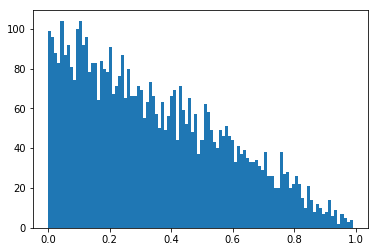

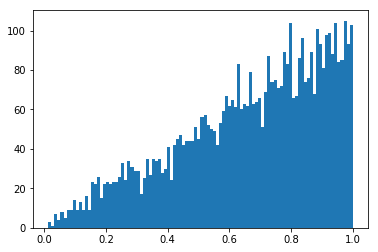

In [28]:
test(10000,0)
test(10000,1)

In [89]:
#set threshold to x_t
x_t = 0.5

def checkRule(rule):
    if not rule in [0,1,2,3]:
        raise ValueError('choose 0 (rule A), 1 (rule B), and so on for first arg')
#define rules of the classifier: Rule A (threshold classifier)[0], Rule B (threshold anti-classifier)[1]
#Rule C (guressing) and Rule D (contant)
def Y_hat(rule,x,x_t):    
    checkRule(rule)  
    return {0:0 if x < x_t else 1,
            1:1 if x < x_t else 0,
            2:round(rd.random()),
            3:1}[rule]
    
#define functionn to decide Y values for and array of X values
def decide(rule,X,x_t):
    Y_decision = []
    for x in X:
        Y_decision.append(Y_hat(rule,x,x_t))
    return np.array(Y_decision)

#define function to evaluate mean of abs(Y_hat-Y_star)
def error(rule,N,x_t):
    X,Y_star = create_data(N)
    Y = decide(rule,X,x_t)
    del_Y = abs(Y_star - Y)
    return np.mean(del_Y)

#evaluate error for x_t element of environment(0.5)
def minerror(N):
    X_t = np.linspace(0.4,0.6,100)
    Error = []
    for x_t in X_t:
        Error.append(error(0,N,x_t))
    Error = np.array(Error)
    
    return X_t,Error

#calculate error for x_t in {0.2,0.5,0.6}
def errorArray(rule,N,X_t):
    Err = []
    for x_t in X_t:
        Err.append(error(rule,N,x_t))
    return Err

In [90]:
#analytical solution
def theoError(rule,x):
    checkRule(rule)
    return {0:.25+(x-.5)**2,
            1:.75-(x-.5)**2,
            2:.5,
            3:.5}[rule]
#evaluate error for x_t element of environment(0.5)
def minerror(N):
    X_t = np.linspace(0.4,0.6,100)
    Error = []
    for x_t in X_t:
        Error.append(error(0,N,x_t))
    Error = np.array(Error)
    return X_t,Error
#gerneral parabola
def parabola(x,u,a,c):
    return a*(x-u)**2+c

In [85]:
x,err=minerror(100000)

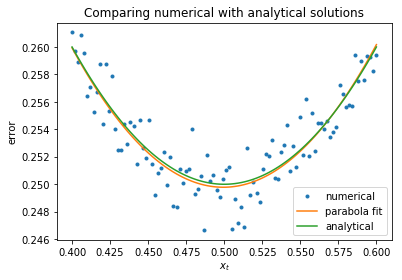

In [91]:
popt,pcov=curve_fit(parabola,x,err)
plt.title('Comparing numerical with analytical solutions')
plt.plot(x,err,'.',label='numerical')
plt.plot(x,parabola(x,*popt),label='parabola fit')
plt.plot(x,theoError(0,x),label='analytical')
plt.xlabel('$x_t$')
plt.ylabel('error')
plt.legend()
plt.show()